In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite had to use a different way then normal because it wasn't working with the starter code
engine = create_engine("sqlite:///C:/Users/Joey/Documents/GitHub/School/Week 10/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
BaseModel = automap_base()
# reflect the tables
BaseModel.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
print(BaseModel.classes.keys())

['station', 'measurement']


In [7]:
# Save references to each table
Station = BaseModel.classes.station
MeasurementTable = BaseModel.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(MeasurementTable.date)).scalar()
print("Most recent date:", most_recent_date)

Most recent date: 2017-08-23


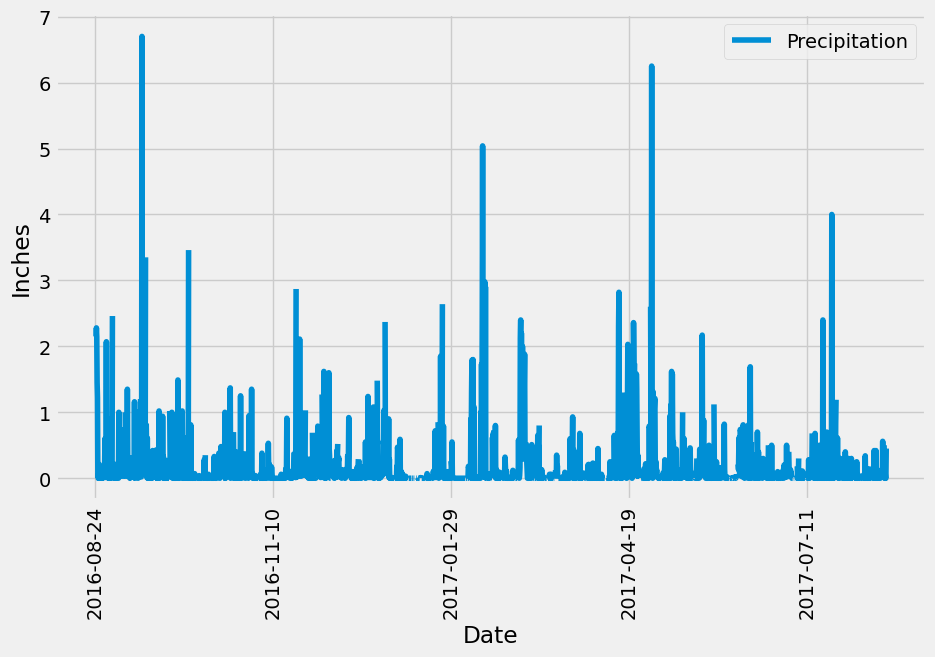

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
year_ago_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(MeasurementTable.date, MeasurementTable.prcp).\
    filter(MeasurementTable.date >= year_ago_date).\
    filter(MeasurementTable.date <= most_recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data = pd.DataFrame(results, columns=['date', 'prcp'])

# Sort the dataframe by date
prcp_data = prcp_data.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data.rename(columns={'prcp': 'Precipitation'}, inplace=True)
ax = prcp_data.plot(x='date', y='Precipitation', figsize=(10, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
plt.xticks(rotation=90) 
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_data['Precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()
print("Total number of stations:", total_stations)

Total number of stations: 9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(MeasurementTable.station, func.count(MeasurementTable.station)).\
    group_by(MeasurementTable.station).\
    order_by(func.count(MeasurementTable.station).desc()).all()

print("Most active stations (Station, Count):")
for station, count in active_stations:
    print(f"{station}, {count}")

most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")

Most active stations (Station, Count):
USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511
Most active station: USC00519281


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(MeasurementTable.tobs)).filter(MeasurementTable.station == most_active_station).scalar()
highest_temp = session.query(func.max(MeasurementTable.tobs)).filter(MeasurementTable.station == most_active_station).scalar()
avg_temp = session.query(func.avg(MeasurementTable.tobs)).filter(MeasurementTable.station == most_active_station).scalar()

print(f"Lowest temperature: {lowest_temp}")
print(f"Highest temperature: {highest_temp}")
print(f"Average temperature: {round(avg_temp, 2)}")

Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66


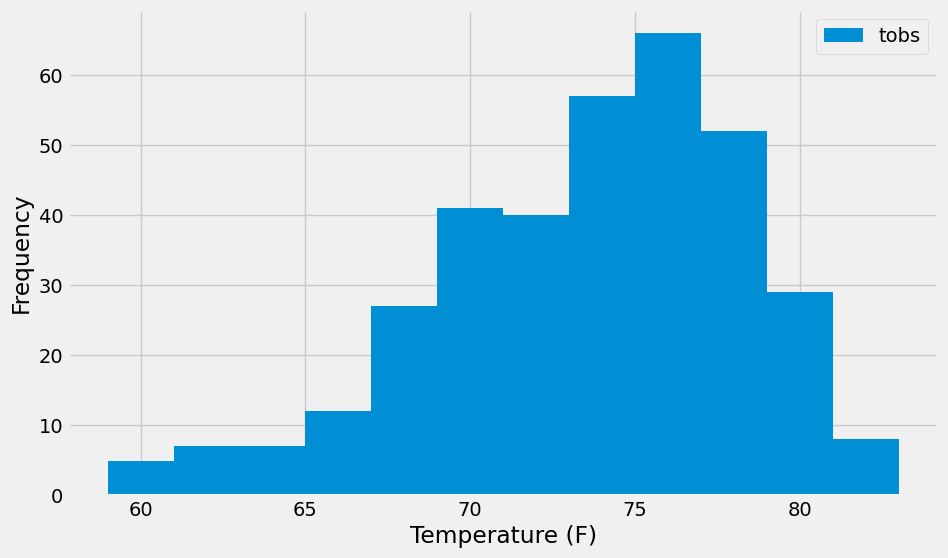

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(MeasurementTable.date, MeasurementTable.tobs).\
    filter(MeasurementTable.station == most_active_station).\
    filter(MeasurementTable.date >= year_ago_date).\
    filter(MeasurementTable.date <= most_recent_date).all()
temperature_df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])
ax = temperature_df['tobs'].plot(kind='hist', bins=12, figsize=(10, 6), label='tobs')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()